# Regularyzacja LASSO, Ridge, Elastic Net

## Przedstawienie problemu

Ponizsze dane zawierają informację na temat współczynnika genetycznego pewnej choroby oraz ekspresji genów dla $1000$ pacjentów. Naszym zadaniem będzie sprawdzenie zależności (zdudowanie modelu statystycznego) pomiędzy informacją genetyczną, a indeksem chorobowym. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

gene_data = pd.read_csv("data/gene expression.csv")
gene_data

,disease_indicator,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
0,-2.937794,-1.207066,-1.205333,-0.973819,-0.385072,-0.962873,-0.825144,0.023392,0.249881,-0.299325,...,-0.303823,-1.997002,-1.268515,-0.166643,0.173221,1.027971,0.299238,-0.077520,1.866126,0.217892
1,1.110904,0.277429,0.301467,-0.099631,0.514055,-0.813712,0.347168,-0.204902,0.481920,-0.362398,...,-0.581623,-0.732298,-1.348586,0.372561,-0.765171,0.190115,-0.048095,-0.098347,-0.277120,-0.048143
2,-7.342600,1.084441,-1.539145,-0.110735,0.308004,-0.194512,-0.920093,-1.049402,-0.584051,-0.924871,...,0.461320,-0.400628,0.187157,0.267106,0.677449,1.074012,0.047437,0.935116,-0.628793,-0.764516
3,7.747371,-2.345698,0.635371,1.192195,1.839154,1.916013,-0.287336,0.016889,1.042713,0.395760,...,-1.727101,-0.270288,1.228877,-2.670715,-0.519727,-0.328582,-0.825309,-0.817777,-0.716570,-0.224503
4,-2.872028,0.429125,0.702952,-1.655886,1.593405,0.701769,-0.551130,-0.306343,1.384544,0.281415,...,0.587151,1.441910,-1.574249,-1.514545,0.830039,-0.379623,0.531506,0.906511,1.072289,0.666093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.415095,-0.216320,0.261722,1.706471,0.555580,-1.196431,-0.355663,-1.966713,0.788707,0.330298,...,1.753508,1.066614,2.494430,1.558894,0.936826,-0.339432,1.196886,0.639897,1.187620,-0.401922
996,5.078293,0.549856,1.334695,-1.521243,0.192257,0.141452,0.227806,0.710682,0.607903,0.902859,...,-0.058202,-1.711519,0.063803,0.450900,1.855251,0.760492,0.570959,-0.437103,0.205727,-0.674824
997,-2.644617,0.482736,0.247747,1.146917,1.026826,-0.393832,-0.561344,-0.376735,-0.734039,-0.426135,...,-0.151355,-1.563203,0.631759,-0.040236,1.014956,-0.695214,0.123247,0.391909,0.735752,-0.157513
998,5.212235,0.760849,-1.375785,0.234440,-0.983478,-0.061958,-0.371238,0.289356,2.841597,0.731189,...,0.986182,-0.189626,1.366594,0.174719,0.899885,-1.272737,0.970013,-0.255478,-0.880389,-1.138162


Poniewaz zmienna `disease_indicator` przyjmuje wartości z przestrzeni liczb rzeczywistych moglibyśmy użyć znanego nam już modelu regresji liniowej.

In [3]:
# Zadanie 1
# Podziel zbiór na treningowy i testowy
# Zbuduj model regresji liniowej
# Podaj błąd kwadratowy na zbiorze treningowym i testowym
# Podaj R^2 modelu
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Podział na zmienne objaśniające i zmienną objaśnianą
X = gene_data.drop('disease_indicator', axis=1)
y = gene_data['disease_indicator']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Dodanie stałej kolumny do X_train i X_test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Budowa modelu regresji liniowej
model = sm.OLS(y_train, X_train)
results = model.fit()

# Predykcja wartości dla zbioru treningowego i testowego
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)

# Błąd kwadratowy dla zbioru treningowego i testowego
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

# R^2 dla zbioru treningowego i testowego
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R^2 dla zbioru treningowego: ", r2_train)
print("R^2 dla zbioru testowego: ", r2_test)

Błąd kwadratowy dla zbioru treningowego:  2.608847177344486e-28
Błąd kwadratowy dla zbioru testowego:  18.178739105258195
R^2 dla zbioru treningowego:  1.0
R^2 dla zbioru testowego:  0.16086599924183254


Od razu widzimy, że coś jest nie tak. Na zbiorze treningowym osiaga prawie zerowy błąd, na zbiorze testowym jednak wypada on fatalnie. Jest to typowy przypkad **overfittingu**, czyli **zbyt wysokiej wariancji modelu**. Overfitting spowodowany jest uzyciem zbyt elastycznego modelu, jednakże zazwyczaj rozumiemy to poprzez użycie zbyt elastycznej architektury jak np. sieci nauronowego do prostego problemu. Model regresji liniowej jest bardzo prostym modelem więc nie powinno byc z tym problemu.

Overfitting może jednak występować także dla prostych modeli w przypadku gdy posiadamy więcej predyktorów niż obserwacji: $p \geq N$. We wspomianym przypadku estymatory oparte na metodzie największej wiarygodności jak i na metodzie najmniejszych kwadratów narażone sa na przeuczenie modelu. 

Zwizualizujmy co się dzieje na prostym przykładzie zakładając, że mamy w naszym zbiorze treningowym tylko 2 obserwacje i używamy jednego predyktora (dodając wyraz wolny mamy $p=N$). W takim przypadku łatwo zauważyć, że model regresji liniowej da nam po prostu wzór na linię przechodzącą przez obie obserwacje:

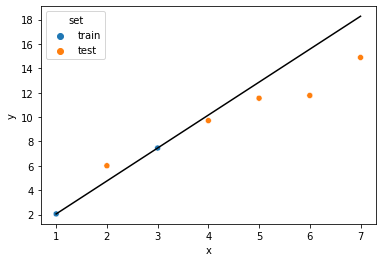

In [4]:
np.random.seed(2222)

sample_data = pd.DataFrame({
    "x": [1, 2, 3, 4, 5, 6, 7],
    "y": [2*x + 1 + np.random.normal() for x in range(1, 8)],
    "set": ["train", "test", "train", "test", "test", "test", "test"]
})

train_data = sample_data.loc[sample_data["set"] == "train", ["x", "y"]]

test_model = LinearRegression().fit(train_data[["x"]], train_data["y"])
test_model_intercept = test_model.intercept_
test_model_slope = test_model.coef_[0]

sns.scatterplot(data=sample_data, x="x", y="y", hue="set") 
plt.plot(sample_data["x"], test_model_intercept + test_model_slope * sample_data["x"], color='black')
plt.show()

## Regresja grzbietowa

Aby rozwiazać ten problem musimy zastanowić się jak zmnieszyć wariancję naszego modelu. Wariancja i obciążenie (bias) są ze sobą ścisle powiązane. Zmniejszająć jedno zwiększamy drugie - bias-variance tradeoff, tak więc moglibyśmy sprawdzić co stanie się gdy do naszego modelu dodamy obciażanie. dokonamy tego dodając **regularyzacji** naszego modelu, karając model za zbyt wysokie współczynniki $\beta$. Mówiąc dokładniej w regularyzowanej wersji naszego modelu minimalizować będziemy nie loglikelihood (lub błąd kwadratowy), a poniższe wyrażenie:

$$
\hat{\beta} = agrmin_{\beta} (-\ell(\beta) + \lambda\sum_{i=1}^p \beta_p^2)
$$

Jest to tak zwana **regresja grzbietowa** (Ridge regression). Parametr $\lambda$ jest **hiperparametrem** modelu, który musimy ustalić. Jest to tak zwany **współczynnik kary** - im większa $\lambda$ tym bardziej "karamy" nasz model za zbyt duże wartości parametrów. W przypadku regresji liniowej wartość likelihood mozemy zastąpić błędem kwadratowym, i bezpośrednio znaleźć postać rozwiązania:

$$
\hat{\beta} = (X^TX + \lambda I)^{-1}X^Ty
$$
Zwizualizujmy rozwiązanie regresji grzbietowej dla kilku wartości $\lambda$:

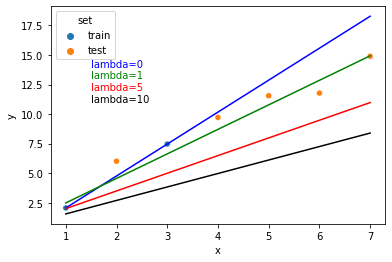

In [5]:
X = np.c_[np.ones(len(sample_data[sample_data["set"] == "train"])), 
          sample_data[sample_data["set"] == "train"][["x"]].values]
y = sample_data[sample_data["set"] == "train"][["y"]].values

ridge_intercept = np.mean(y)

solution_lambda_0 = np.linalg.inv(X.T @ X) @ X.T @ y
solution_lambda_1 = np.linalg.inv(X.T @ X + 1*np.identity(X.shape[1])) @ X.T @ y
solution_lambda_5 = np.linalg.inv(X.T @ X + 5*np.identity(X.shape[1])) @ X.T @ y
solution_lambda_10 = np.linalg.inv(X.T @ X + 10*np.identity(X.shape[1])) @ X.T @ y

sns.scatterplot(data=sample_data, x="x", y="y", hue="set") 
plt.plot(sample_data["x"], 
         test_model_intercept + test_model_slope * sample_data["x"], 
         color='blue')
plt.text(1.5, 14, "lambda=0", color="blue")
plt.plot(sample_data["x"], 
         solution_lambda_1[0,0] + solution_lambda_1[1,0] * sample_data["x"], 
         color='green')
plt.text(1.5, 13, "lambda=1", color="green")
plt.plot(sample_data["x"], 
         solution_lambda_5[0,0] + solution_lambda_5[1,0] * sample_data["x"], 
         color='red')
plt.text(1.5, 12, "lambda=5", color="red")
plt.plot(sample_data["x"], 
         solution_lambda_10[0,0] + solution_lambda_10[1,0] * sample_data["x"], 
         color='black')
plt.text(1.5, 11, "lambda=10", color="black")
plt.show()

Oczywiście pojawia się pytanie, jak wybrać wielkość $lambda$ ? Parametr ten wybierany jest w procesie **cross-walidacji** (CV). CV jest prostą lecz skuteczną metodą estymacji błędu generalizacji dlatego też doskonale nadaje się do estymacji wartości wszelkich hiperparametrów. 

W procesie CV dzielimy nasz zbiór treningowy na **foldy** równej wielkości. Nastepnie budujemy $K$ modeli za nowy zbiór treningowy biorąc $K-1$ foldów - w kazdym z modeli pozostający fold jest traktowany jako zbiór walidacyjny. Nastepnie uśredniamy wyniki (np. bład sredniokwadratowy) ze zbiorów walidacyjnych otrzymując estymację zbioru generalizacyjnego.

Najlepsza wartość lambda: 0.0001
Wynik regresji: 0.13396507285817028


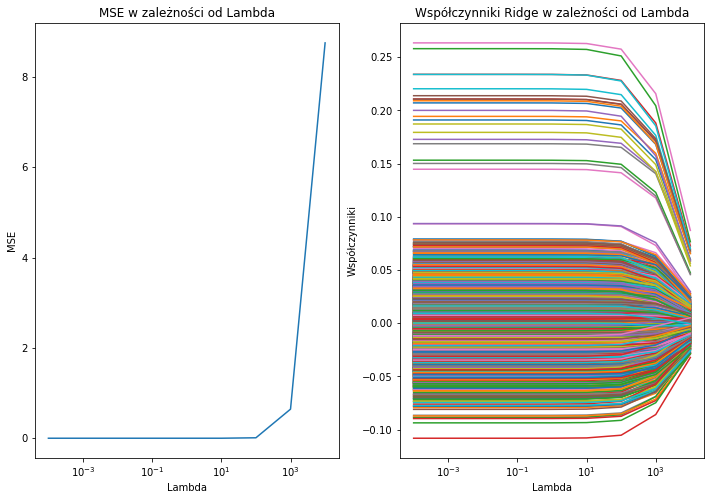

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = gene_data.drop('disease_indicator', axis=1)
y = gene_data['disease_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

param_grid = {'alpha': np.logspace(-4, 4, 9)}

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10)

grid_search.fit(X, y)
best_params = grid_search.best_params_
coefs = []
mse = []
for a in param_grid['alpha']:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    mse.append(np.mean((ridge.predict(X) - y) ** 2))

print(f'Najlepsza wartość lambda: {best_params["alpha"]}')
print(f'Wynik regresji: {grid_search.best_score_}')

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(param_grid['alpha'], mse)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE w zależności od Lambda')
plt.axis('tight')

plt.subplot(1, 2, 2)
plt.plot(param_grid['alpha'], coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Współczynniki')
plt.title('Współczynniki Ridge w zależności od Lambda')
plt.axis('tight')

plt.show()

Mozy teraz policzyć predykcje:

In [7]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

Błąd kwadratowy dla zbioru treningowego:  1.0666993233030129e-14
Błąd kwadratowy dla zbioru testowego:  1.0906865360498076e-14


Regresja grzbietowa jest przykładem **regularyzacji normą $L^q$** gdzie $q=2$:

$$
\hat{\beta} = agrmin_{\beta} (-\ell(\beta) + \lambda\sum_{i=1}^p |\beta_p|^q)
$$

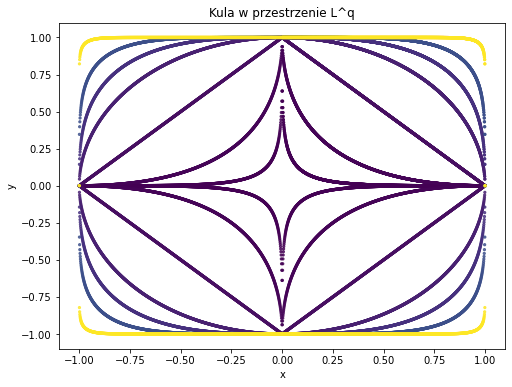

In [8]:
def gen_norm(x, q):
    return (1 - abs(x ** q)) ** (1/q)

q_norms = pd.DataFrame()
q_values = [0.3, 0.5, 1, 2, 3, 5, 20]

for q in q_values:
    points = pd.DataFrame({
        'x': np.arange(0, 1.001, 0.001),
        'y': gen_norm(np.arange(0, 1.001, 0.001), q),
        'q': q
    })
    points_1 = points.copy()
    points_2 = points.copy()
    points_3 = points.copy()
    points_4 = points.copy()
    points_1['y'] = -points_1['y']
    points_2['x'] = -points_2['x']
    points_3['x'] = -points_3['x']
    points_3['y'] = -points_3['y']
    q_norms = pd.concat([q_norms, points, points_1, points_2, points_3, points_4])

q_norms['q'] = q_norms['q'].astype('category')
q_norms = q_norms.sort_values(['q', 'y', 'x'])

plt.figure(figsize=(8, 6))
plt.scatter(q_norms['x'], q_norms['y'], c=q_norms['q'], cmap='viridis', alpha=0.8, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kula w przestrzenie L^q')
plt.show()

## Regresja LASSO

Moznaby się zastanowić co stanie się gdy użyjemy innej normy do regularyzacji. Najczęsciej spotykanym kuzynem regresji grzbietowej jest **regresja LASSO** (least absolute shrinkage and selection operator), gdzie $q=1$:

$$
\hat{\beta} = agrmin_{\beta} (-\ell(\beta) + \lambda\sum_{i=1}^p |\beta_p|)
$$


Najlepsza wartość lambda: 0.1
Wynik regresji: 0.9395054722498735


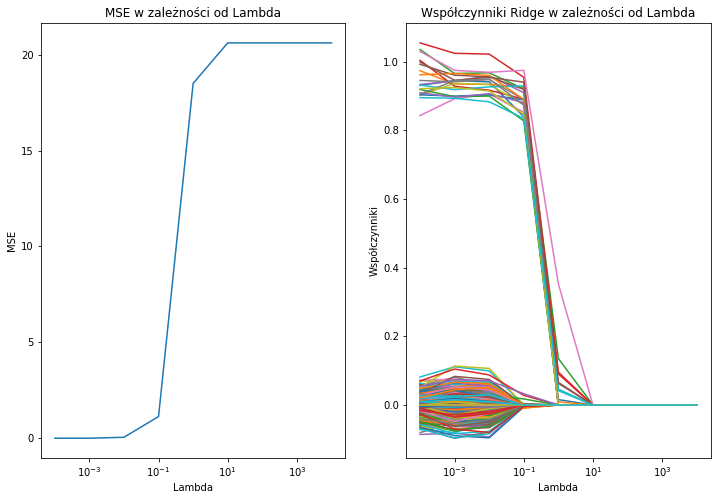

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = gene_data.drop('disease_indicator', axis=1)
y = gene_data['disease_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

param_grid = {'alpha': np.logspace(-4, 4, 9)}

lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

grid_search.fit(X, y)
best_params = grid_search.best_params_
coefs = []
mse = []
for a in param_grid['alpha']:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    mse.append(np.mean((lasso.predict(X) - y) ** 2))

print(f'Najlepsza wartość lambda: {best_params["alpha"]}')
print(f'Wynik regresji: {grid_search.best_score_}')

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(param_grid['alpha'], mse)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE w zależności od Lambda')
plt.axis('tight')

plt.subplot(1, 2, 2)
plt.plot(param_grid['alpha'], coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Współczynniki')
plt.title('Współczynniki Ridge w zależności od Lambda')
plt.axis('tight')

plt.show()

In [10]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

Błąd kwadratowy dla zbioru treningowego:  1.102322404149808
Błąd kwadratowy dla zbioru testowego:  1.1831527423826829


Widać tu pewną różnicę jesli chodzi o wartości współczynników $\beta$. W regresji grzbietowej niektóre wartości są bliskie 0, ale nigdy nie osiągają tej wartości - metoda regresji grzbietowej pozwala tylko na dojście asymptotycznie blisko do 0. W przypadku LASSO dostajemy zerowe współczynniki - daje nam to bardzo przydatną własność, bo LASSO działa jak **selektor zmiennych**.

## Regresja Elastic Net

LASSO daje z reguły lepsze wyniki gdy w naszym zbiorze mamy nieistotne predyktory (zmienne które nie wnoszą informacji do modelu), LASSO potrafi się ich pozbyć. Regresja grzbietowa działa lepiej gdy predyktory są istotne. Jeśli chcemy korzystać z zalet obu podejść możemy użyć regresji **Elastic Net**:

$$
\hat{\beta} = agrmin_{\beta} (-\ell(\beta) + \lambda(\alpha\sum_{i=1}^p |\beta_p| + (1-\alpha)\sum_{i=1}^p \beta_p^2))
$$

Najlepsza wartość lambda: 0.1
Wynik regresji: 0.9267692278554558


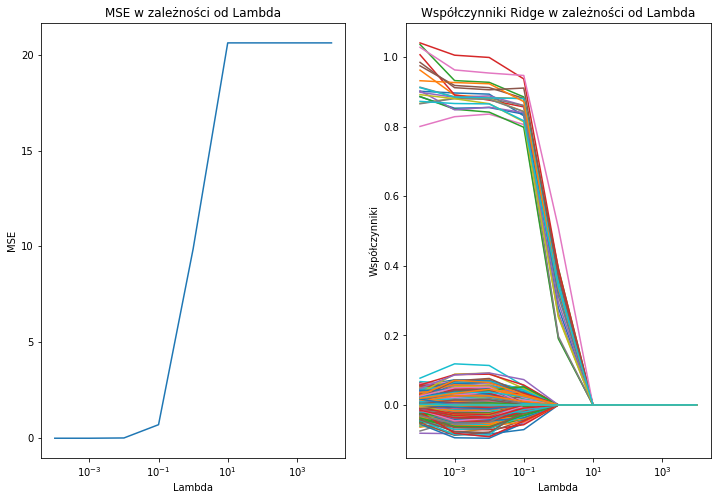

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = gene_data.drop('disease_indicator', axis=1)
y = gene_data['disease_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

param_grid = {'alpha': np.logspace(-4, 4, 9)}

elastic_net = ElasticNet(l1_ratio=0.5)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)

grid_search.fit(X, y)
best_params = grid_search.best_params_
coefs = []
mse = []
for a in param_grid['alpha']:
    elastic_net = ElasticNet(alpha=a, l1_ratio=0.5)
    elastic_net.fit(X, y)
    coefs.append(elastic_net.coef_)
    mse.append(np.mean((elastic_net.predict(X) - y) ** 2))

print(f'Najlepsza wartość lambda: {best_params["alpha"]}')
print(f'Wynik regresji: {grid_search.best_score_}')

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(param_grid['alpha'], mse)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE w zależności od Lambda')
plt.axis('tight')

plt.subplot(1, 2, 2)
plt.plot(param_grid['alpha'], coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Współczynniki')
plt.title('Współczynniki Ridge w zależności od Lambda')
plt.axis('tight')

plt.show()

In [12]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Błąd kwadratowy dla zbioru treningowego: ", mse_train)
print("Błąd kwadratowy dla zbioru testowego: ", mse_test)

Błąd kwadratowy dla zbioru treningowego:  0.6803157722694071
Błąd kwadratowy dla zbioru testowego:  0.7583665254282793


Wartość $\alpha$ jest kolejnym hiperparametrem który należałoby wybrać z użyciem CV i metody seleckji jak np grid search.

# Zadanie
Zbuduj model regresji logistycznej z regularyzacją dla poniższego zbioru danych.
Sprawdź braki danych, rozkłady zmiennych, użyj modułu scikit-learn.

In [13]:
import pickle
import os
import numpy as np

filepaths = os.listdir("data/creditcard/")
for fp in filepaths:
    with open("data/creditcard/" + fp, 'rb') as f:
        globals()[fp.replace(".pickle", "")] = pickle.load(f)

In [ ]:
creditcard_test_X